In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import re as re
from collections import Counter
pd.options.display.max_colwidth=200
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import csv,json
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize as TK
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
ps = PorterStemmer()
recipe = 'train.json'
with open(recipe) as train_file:
    dict_train = json.load(train_file)

print(dict_train[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [3]:
id_ = []
cuisine = []
ingredients = []
for i in range(len(dict_train)):
    id_.append(dict_train[i]['id'])
    cuisine.append(dict_train[i]['cuisine'])
    ingredients.append(dict_train[i]['ingredients'])


In [4]:
recipe=pd.DataFrame({'id':id_,'country food':cuisine,'ingredients':ingredients})

In [5]:
recipe.head()

,id,country food,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m..."


In [6]:
#recipe.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\recipe_csv')

In [7]:
new = []
for s in recipe['ingredients']:
    s = ' '.join(s)
    new.append(s)

In [8]:
recipe['ing']=new
#test['ing']=new_t


In [9]:
recipe.head()

,id,country food,ingredients,ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...",black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double crea...


In [10]:
#traindf = pd.read_json("../input/train.json")
#traindf['ingredients_clean_string'] = [' , '.join(z).strip() for z in traindf['ingredients']]  
#traindf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in traindf['ingredients']]       

#testdf = pd.read_json("../input/test.json") 
#testdf['ingredients_clean_string'] = [' , '.join(z).strip() for z in testdf['ingredients']]
#testdf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in testdf['ingredients']] 

In [11]:
#vectorizertr = TfidfVectorizer(stop_words='english',
                             #ngram_range = ( 1 , 1 ),analyzer="word", 
                             #max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)

In [12]:
#ingr=[]
#for s in recipe['ing']:
    #s=s.lower()
    #saca el simbolito TradeMark
    #s=re.sub(u'\w*\u2122', '', s)
    #elimina contenido entre parentesis
    #s=re.sub(r'\([^)]*\)', '', s)
    #saco los digitos
    #s=re.sub(r'\r','',s)
    #saco la puntuacion
    #s=re.sub(r'[^\w\s]','',s)
    #ingr.append(s)
    


In [13]:
#recipe['ing']=ingr

In [14]:
recipe

,id,country food,ingredients,ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...",black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double crea...
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, warm water, large eggs, all-purpose flour, whole wheat flour, cooking spray, boiling water, steel-cut oats, dry yeast, salt]",light brown sugar granulated sugar butter warm water large eggs all-purpose flour whole wheat flour cooking spray boiling water steel-cut oats dry yeast salt
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, broccoli florets, rotini, pitted black olives, Kraft Grated Parmesan Cheese, red pepper]",KRAFT Zesty Italian Dressing purple onion broccoli florets rotini pitted black olives Kraft Grated Parmesan Cheese red pepper
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starter, flour, hot tea, sugar, ground nutmeg, salt, ground cinnamon, milk, butter]",eggs citrus fruit raisins sourdough starter flour hot tea sugar ground nutmeg salt ground cinnamon milk butter
39772,41882,chinese,"[boneless chicken skinless thigh, minced garlic, steamed white rice, baking powder, corn starch, dark soy sauce, kosher salt, peanuts, flour, scallions, Chinese rice vinegar, vodka, fresh ginger, ...",boneless chicken skinless thigh minced garlic steamed white rice baking powder corn starch dark soy sauce kosher salt peanuts flour scallions Chinese rice vinegar vodka fresh ginger egg whites bro...


In [15]:
#test['q ing']=test['ingredients'].apply(len)

In [16]:
recipe

,id,country food,ingredients,ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...",black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double crea...
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, warm water, large eggs, all-purpose flour, whole wheat flour, cooking spray, boiling water, steel-cut oats, dry yeast, salt]",light brown sugar granulated sugar butter warm water large eggs all-purpose flour whole wheat flour cooking spray boiling water steel-cut oats dry yeast salt
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, broccoli florets, rotini, pitted black olives, Kraft Grated Parmesan Cheese, red pepper]",KRAFT Zesty Italian Dressing purple onion broccoli florets rotini pitted black olives Kraft Grated Parmesan Cheese red pepper
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starter, flour, hot tea, sugar, ground nutmeg, salt, ground cinnamon, milk, butter]",eggs citrus fruit raisins sourdough starter flour hot tea sugar ground nutmeg salt ground cinnamon milk butter
39772,41882,chinese,"[boneless chicken skinless thigh, minced garlic, steamed white rice, baking powder, corn starch, dark soy sauce, kosher salt, peanuts, flour, scallions, Chinese rice vinegar, vodka, fresh ginger, ...",boneless chicken skinless thigh minced garlic steamed white rice baking powder corn starch dark soy sauce kosher salt peanuts flour scallions Chinese rice vinegar vodka fresh ginger egg whites bro...


In [17]:
# substitute the matched pattern
def sub_match(pattern, sub_pattern, ingredients):
    for i in ingredients.index.values:
        for j in range(len(ingredients[i])):
            ingredients[i][j] = re.sub(pattern, sub_pattern, ingredients[i][j].strip())
            ingredients[i][j] = ingredients[i][j].strip()
    re.purge()
    return ingredients

def regex_sub_match(series):
    # remove all units
    p0 = re.compile(r'\s*(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\s*[^a-z]')
    series = sub_match(p0, ' ', series)
    # remove all digits
    p1 = re.compile(r'\d+')
    series = sub_match(p1, ' ', series)
    # remove all the non-letter characters
    p2 = re.compile('[^\w]')
    series = sub_match(p2, ' ', series)
    #remove all the trademark character
    p3=re.compile(u'\w*\u2122')
    series = sub_match(p3, ' ', series)

    return series

In [18]:
# declare instance from WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# remove all the words that are not nouns -- keep the essential ingredients
def lemma(series):
    for i in series.index.values:
        for j in range(len(series[i])):
            # get rid of all extra spaces
            series[i][j] = series[i][j].strip()
            # Tokenize a string to split off punctuation other than periods
            token = TK(series[i][j])
            # set all the plural nouns into singular nouns
            for k in range(len(token)):
                token[k] = lemmatizer.lemmatize(token[k])
            token = ' '.join(token)
            # write them back
            series[i][j] = token
    return series

In [19]:
ingr_series_recipe = recipe['ingredients']
ing_series_recipe=regex_sub_match(ingr_series_recipe)

In [20]:
ingr_series_recipe

0                                                                                 [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]
1                                                                          [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]
2                                                           [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]
3                                                                                                                                                                            [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin,

In [21]:
ingredients_recipe = lemma(ingr_series_recipe)


In [22]:
recipe['ingredients_lemma'] = ingredients_recipe
recipe['ingredients_lemma_string'] = [' '.join(_).strip() for _ in recipe['ingredients_lemma']]

In [23]:
recipe['q ing']=recipe['ingredients_lemma'].apply(len)

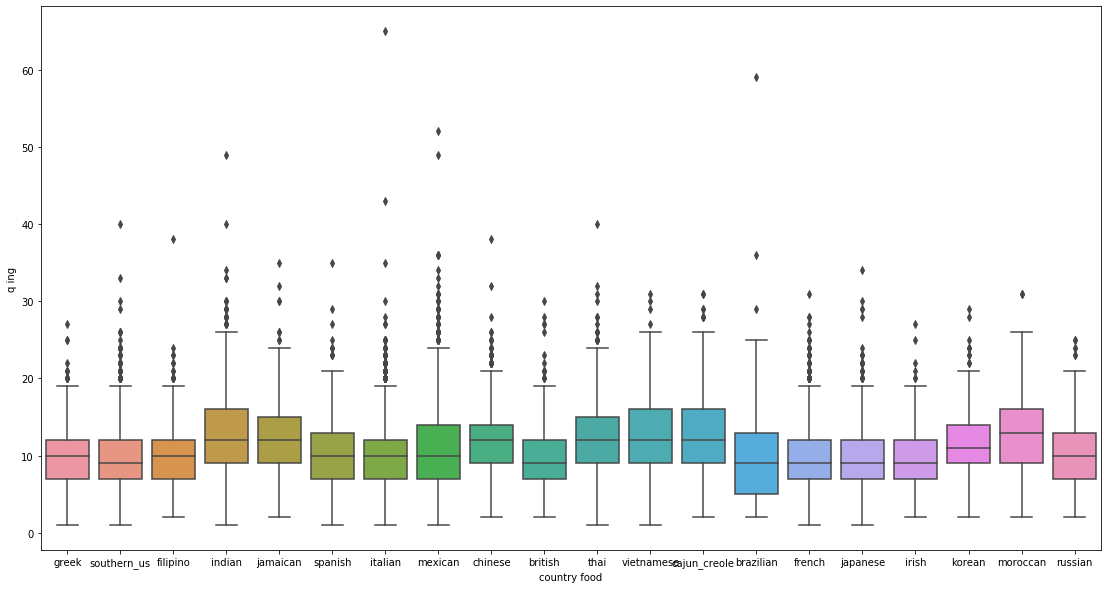

In [24]:
plt.figure(figsize=(19,10))
sns.boxplot(x='country food',y='q ing',data=recipe)
plt.savefig('boxplot country.png')
plt.show()


In [25]:
recipe.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\recipe_csv')

In [26]:
recipe.sample(30)

,id,country food,ingredients,ing,ingredients_lemma,ingredients_lemma_string,q ing
4205,486,vietnamese,"[peeled fresh ginger, cooked rice, vegetable oil, green onion, kosher salt, cooked chicken breast]",peeled fresh ginger cooked rice vegetable oil green onions kosher salt cooked chicken breasts,"[peeled fresh ginger, cooked rice, vegetable oil, green onion, kosher salt, cooked chicken breast]",peeled fresh ginger cooked rice vegetable oil green onion kosher salt cooked chicken breast,6
13652,39735,italian,"[mussel, olive oil, bay leaf, squid, onion, tentacle, fennel bulb, clam juice, shrimp, cod, kosher salt, whole peeled tomato, crushed red pepper flake, country bread, fennel seed, ground black pep...",mussels olive oil bay leaves squid onions tentacles fennel bulb clam juice shrimp cod kosher salt whole peeled tomatoes crushed red pepper flakes country bread fennel seeds ground black pepper dry...,"[mussel, olive oil, bay leaf, squid, onion, tentacle, fennel bulb, clam juice, shrimp, cod, kosher salt, whole peeled tomato, crushed red pepper flake, country bread, fennel seed, ground black pep...",mussel olive oil bay leaf squid onion tentacle fennel bulb clam juice shrimp cod kosher salt whole peeled tomato crushed red pepper flake country bread fennel seed ground black pepper dry white wi...,19
29522,1402,mexican,"[granulated sugar, ground cayenne pepper, lime juice, paprika, mayonaise, butter, popped popcorn, salt]",granulated sugar ground cayenne pepper lime juice paprika mayonaise butter popped popcorn salt,"[granulated sugar, ground cayenne pepper, lime juice, paprika, mayonaise, butter, popped popcorn, salt]",granulated sugar ground cayenne pepper lime juice paprika mayonaise butter popped popcorn salt,8
29795,4068,indian,"[curry powder, sugar, ground coriander, kosher salt, ground cumin, sweet paprika]",curry powder sugar ground coriander kosher salt ground cumin sweet paprika,"[curry powder, sugar, ground coriander, kosher salt, ground cumin, sweet paprika]",curry powder sugar ground coriander kosher salt ground cumin sweet paprika,6
34544,21289,mexican,"[egg, honey, anise, sugar, baking powder, shortening, flour, water, vegetable oil]",eggs honey anise sugar baking powder shortening flour water vegetable oil,"[egg, honey, anise, sugar, baking powder, shortening, flour, water, vegetable oil]",egg honey anise sugar baking powder shortening flour water vegetable oil,9
7828,18654,mexican,"[chopped cilantro fresh, green onion, cooked chicken breast]",chopped cilantro fresh green onions cooked chicken breasts,"[chopped cilantro fresh, green onion, cooked chicken breast]",chopped cilantro fresh green onion cooked chicken breast,3
20223,44187,thai,"[basil leaf, crushed red pepper, firmly packed light brown sugar, chicken breast, red bell pepper, light soy sauce, yellow bell pepper, snow pea, lime zest, green onion, creamy peanut butter]",basil leaves crushed red pepper firmly packed light brown sugar chicken breasts red bell pepper light soy sauce yellow bell pepper snow peas lime zest green onions creamy peanut butter,"[basil leaf, crushed red pepper, firmly packed light brown sugar, chicken breast, red bell pepper, light soy sauce, yellow bell pepper, snow pea, lime zest, green onion, creamy peanut butter]",basil leaf crushed red pepper firmly packed light brown sugar chicken breast red bell pepper light soy sauce yellow bell pepper snow pea lime zest green onion creamy peanut butter,11
2529,3543,french,"[roasted red pepper, haricot verts, NiÃ oise olive, white wine vinegar, red potato, tuna packed in olive oil]",roasted red peppers haricots verts NiÃ§oise olives white wine vinegar red potato tuna packed in olive oil,"[roasted red pepper, haricot verts, NiÃ oise olive, white wine vinegar, red potato, tuna packed in olive oil]",roasted red pepper haricot verts NiÃ oise olive white wine vinegar red potato tuna packed in olive oil,6
37265,10222,japanese,"[water, rice, nori, mayonaise, rice vinegar, imitation crab meat, sugar

In [27]:
train, test,= train_test_split(recipe, test_size = 0.2, random_state = 42)

In [28]:
#train.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\train_recipe_csv')

In [29]:
X_train=train[['ingredients_lemma_string']]

In [30]:
X_test=test[['ingredients_lemma_string']]

In [31]:
print(X_train.shape)
print(X_test.shape)

(31819, 1)
(7955, 1)


In [32]:
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()
lenc.fit(train['country food'])
y_train=lenc.transform(train['country food'])
y_test=lenc.transform(test['country food'])

In [33]:
print(y_train.shape)
print(y_test.shape)

(31819,)
(7955,)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [35]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer="word", max_df=0.65, min_df=2,binary=True)
X_train_v= vectorizer.fit_transform(X_train['ingredients_lemma_string'])


In [36]:
print(X_train_v.shape)

(31819, 2129)


In [37]:
features_df=pd.DataFrame(vectorizer.get_feature_names())

In [38]:
features_df.head()

,0
0,abalone
1,abura
2,acai
3,accent
4,achiote


# Modelo 1 : kNN Classifier

In [ ]:
k_scores=[]
for K in range(50):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto',n_jobs=-1)
    neigh.fit(X_train_v, y_train) 
    scores = cross_val_score(neigh, X_train_v, y_train, cv=5, scoring='accuracy')
    y_pred = neigh.predict(X_train_v)
    k_scores.append(scores.mean())
    print("Accuracy is ", scores.mean()*100,"% for K-Value:",K_value)

In [ ]:
kscoresdf=pd.DataFrame(k_scores)

In [ ]:
kscoresdf.rename(columns=({0:'Accuracy'}),inplace=True)


In [ ]:
kscoresdf['K']=kscoresdf.index+1

In [ ]:
kscoresdf.sort_values(by='Accuracy',ascending=False)

In [ ]:
kscoresdf.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\K_Accuracy_lem.csv')

In [ ]:
sns.lmplot('K','Accuracy',data=kscoresdf,fit_reg=False,height=15)
plt.title('Accucary in Val Set')
#plt.savefig(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\K_Accuracy.png')
#plt.ylim(-0.005,0)

# Modelo 2 : Regresion Logistica

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log=LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=500,n_jobs=-1)
log.fit(X_train_v, y_train) 
scores = cross_val_score(log, X_train_v, y_train, cv=5, scoring='accuracy')
y_pred_log = log.predict(X_train_v)
print('Cv Accuracy scores: ',scores)
print("Mean of Accuracy is ", scores.mean()*100)
print("Std of Accuracy is ", scores.std()*100)

Cv Accuracy scores:  [0.77953868 0.77603267 0.78123527 0.7831761  0.77894902]
Mean of Accuracy is  77.97863477608641
Std of Accuracy is  0.2385051284969491


# Modelo 3: Multinomial Naive Bayes Classifier

In [41]:
nb=MultinomialNB()
nb.fit(X_train_v, y_train) 
scores = cross_val_score(nb, X_train_v, y_train, cv=5, scoring='accuracy')
y_pred_nb = nb.predict(X_train_v)
print('Cv Accuracy scores: ',scores)
print("Mean of Accuracy is ", scores.mean()*100)
print("Std of Accuracy is ", scores.std()*100)

Cv Accuracy scores:  [0.67550604 0.67268729 0.67939651 0.68380503 0.6749528 ]
Mean of Accuracy is  67.72695355999157
Std of Accuracy is  0.3916908075130887


# Modelo 4: SVM 

In [ ]:
X_test_v= vectorizer.transform(X_test['ingredients_lemma_string'])


# Mejor Modelo en Test

In [ ]:
y_test_pred=log.predict(X_test_v)
print("Accuracy: ",accuracy_score(y_test,y_test_pred)*100)
print("Precision Score: ",precision_score(y_test, y_test_pred, average='macro')*100)
print("Recall Score: ",recall_score(y_test, y_test_pred, average='macro')*100)
print("F1 Score: ",f1_score(y_test, y_test_pred, average='macro')*100)


In [ ]:
y_prob_test=log.predict_proba(X_test_v)

In [ ]:
prob_test=pd.DataFrame(y_prob_test)

In [ ]:
prob_test.rename(columns={0:'brazilian', 1:'british', 2:'cajun_creole', 3:'chinese', 4:'filipino', 5:'french', 6:'greek', 7:'indian', 
                            8:'irish', 9:'italian', 10:'jamaican', 11:'japanese',
                            12:'korean', 13:'mexican', 14:'moroccan', 
                            15:'russian', 16:'southern_us', 17:'spanish', 
                            18:'thai',19:'vietnamese'},inplace=True)

In [ ]:
test_reset=test.reset_index()

In [ ]:
test_reset

In [ ]:
prob_test['y_test']=test_reset['country food']
prob_test

In [ ]:
label_t

In [ ]:
label_t_p=list(set(label_t_p))

In [ ]:
import scikitplot as skplt 
label_t=lenc.inverse_transform(y_test)
label_t_p=lenc.inverse_transform(y_test_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True,figsize=(15,15),cmap='Reds')
plt.title('Normalized Confusion Matrix')
plt.savefig(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\confusion_matrix.png')
plt.show()

In [ ]:
probas=log.predict_proba(X_test_v)
skplt.metrics.plot_precision_recall(y_test, probas,figsize=(15,15))

In [ ]:
skplt.metrics.plot_roc(y_test, probas,classes_to_plot=None,figsize=(15,15))

In [ ]:
conf_matrix=pd.DataFrame(confusion_matrix(y_test, y_test_pred))

In [ ]:
conf_matrix.rename(columns={0:'brazilian', 1:'british', 2:'cajun_creole', 3:'chinese', 4:'filipino', 5:'french', 6:'greek', 7:'indian', 
                            8:'irish', 9:'italian', 10:'jamaican', 11:'japanese',
                            12:'korean', 13:'mexican', 14:'moroccan', 
                            15:'russian', 16:'southern_us', 17:'spanish', 
                            18:'thai', 19:'vietnamese'},index={0:'brazilian', 1:'british', 2:'cajun_creole', 3:'chinese', 4:'filipino', 5:'french', 6:'greek', 7:'indian', 
                            8:'irish', 9:'italian', 10:'jamaican', 11:'japanese',
                            12:'korean', 13:'mexican', 14:'moroccan', 
                            15:'russian', 16:'southern_us', 17:'spanish', 
                            18:'thai', 19:'vietnamese'},inplace=True)


In [ ]:
conf_matrix.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\conf_matrix.csv')

In [ ]:
test['country food'].value_counts()

In [ ]:
prob_test.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\proba_test_df.csv')

In [ ]:
test_df=pd.DataFrame(y_test)

In [ ]:
test_df['y_pred']=y_test_pred

In [ ]:
test_df.rename(columns={0:'y real'},inplace=True)

In [ ]:
test_df

In [ ]:
test

In [ ]:
test_df.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 3\datasets ideas\Recetas e Ingredientes\test_df.csv')

In [ ]:
test_df